<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/homework_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as st
import seaborn as sb

Загрузить датасет по url:


In [0]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [6]:
df.head(15)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

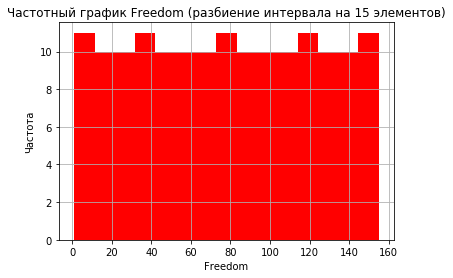

Распределение равномерное


In [13]:
dsp = df.loc[df['Freedom']>0] # убираем выбросы
n, bins, patches = plt.hist(dsp['Freedom'], 15, facecolor='r')

plt.xlabel('Freedom')
plt.ylabel('Частота')
plt.title('Частотный график Freedom (разбиение интервала на 15 элементов)')
plt.grid(True)
plt.show()

print('Распределение равномерное')

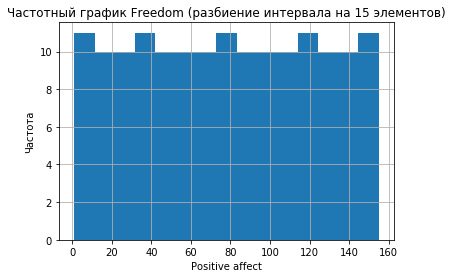

Распределение равномерное


In [14]:
dsp = df.loc[df['Positive affect']>0] # убираем выбросы
n, bins, patches = plt.hist(dsp['Positive affect'], 15)

plt.xlabel('Positive affect')
plt.ylabel('Частота')
plt.title('Частотный график Freedom (разбиение интервала на 15 элементов)')
plt.grid(True)
plt.show()

print('Распределение равномерное')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [34]:
data = df.loc[df['Freedom'].notna()]['Freedom']
disp = {}

disp['Медиана'] = st.median(data)
disp['Мат.ожидание'] = st.mean(data)
disp['Станд.отклон'] = st.pstdev(data)
disp['Дисперсия'] = st.pvariance(data)
disp['Минимум'] = min(data)
disp['Максимум'] = max(data)

disp

{'Дисперсия': 2002.0,
 'Максимум': 155.0,
 'Мат.ожидание': 78.0,
 'Медиана': 78.0,
 'Минимум': 1.0,
 'Станд.отклон': 44.74371464239419}

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

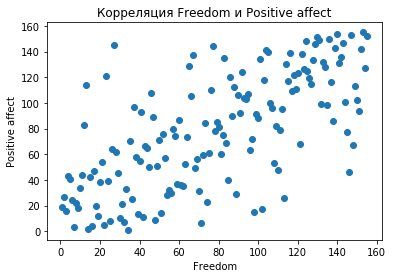

Коэффициент корреляции Пирсона: 0.6817698430601656
Положительнный знак корреляции Пирсона говорит о том, что взаимосвязь есть и она прямая, т.е. при наблюдении большей оценки свободы, с высокой степенью вреоятности можно ожидать наблюдение более высокой оценки положительных эмоций.


In [35]:
data = df.loc[df['Freedom'].notna()].loc[df['Positive affect'].notna()] # очищаем от выбросов

fdm = data['Freedom']
pos = data['Positive affect']

plt.scatter(fdm,pos)
plt.ylabel('Positive affect')
plt.xlabel('Freedom')
plt.title('Корреляция Freedom и Positive affect')
plt.show()

from scipy.stats import pearsonr

corr, p_value = pearsonr(fdm, pos)
print('Коэффициент корреляции Пирсона:', corr)
print('Положительнный знак корреляции Пирсона говорит о том, что взаимосвязь есть и она прямая, т.е. при наблюдении большей оценки свободы, с высокой степенью вреоятности можно ожидать наблюдение более высокой оценки положительных эмоций.')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [77]:
data = df.loc[df['Freedom'].notna()]['Freedom']

avg = st.mean(data)
x0 = min(data)
x1 = max(data)

data_1 = (data - avg) / (x1 - avg)

# Проверим как всё нормализовалось
dat = pd.DataFrame(data).sort_values('Freedom') 
dat['Normalized'] = data_1

dat = dat[:5].append(dat[76:79]).append(dat[-5:])
dat

,Freedom,Normalized
40,1.0,-1.000000
108,2.0,-0.987013
2,3.0,-0.974026
20,4.0,-0.961039
0,5.0,-0.948052
63,77.0,-0.012987
152,78.0,0.000000
71,79.0,0.012987
121,151.0,0.948052
146,152.0,0.961039


Построить матрицу корреляций для всех колонок таблицы

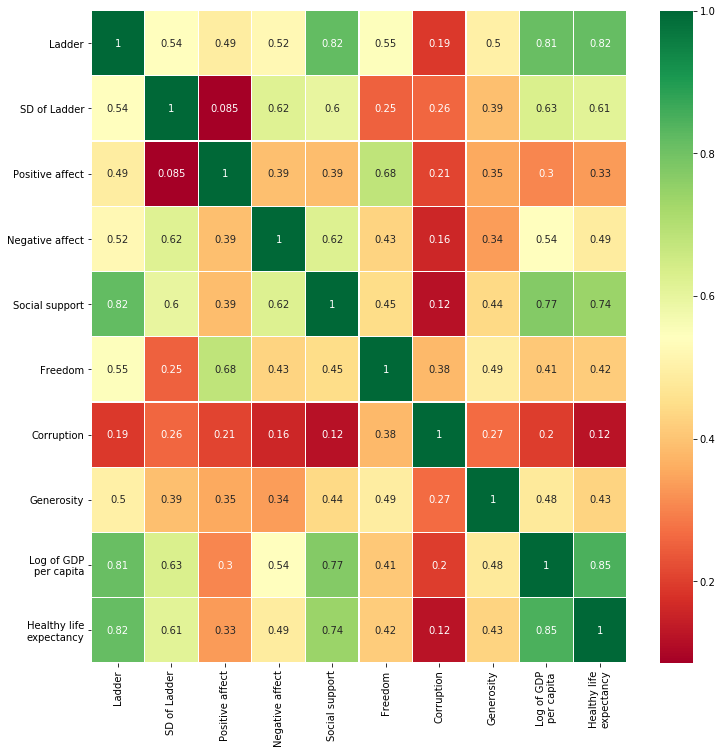

In [79]:

sb.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


Загрузить следующую таблицу: 

In [85]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df.sort_values('4046',ascending=False)[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8366,47,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
9097,7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
2699,47,2015-02-01,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS


Сделать частотный график колонки AveragePrice. Какое это распределение?

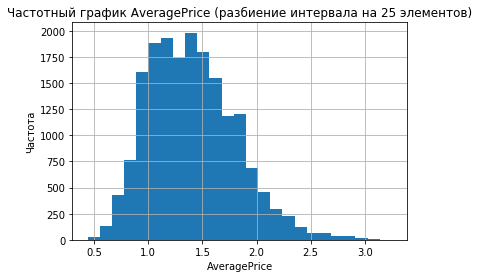

Распределение близко к нормальному


In [82]:
dsp = df.loc[df['AveragePrice'].notna()] # убираем выбросы
n, bins, patches = plt.hist(dsp['AveragePrice'], 25)

plt.xlabel('AveragePrice')
plt.ylabel('Частота')
plt.title('Частотный график AveragePrice (разбиение интервала на 25 элементов)')
plt.grid(True)
plt.show()

print('Распределение близко к нормальному')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

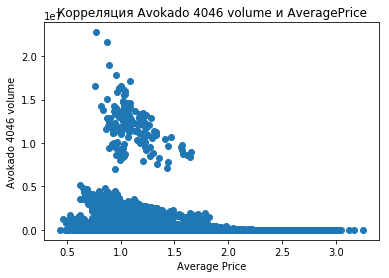

Коэффициент корреляции Пирсона: -0.2083170484878848
Есть слабая отрицательная корреляция, т.е. высокие объёмы покупок можно наблюдать при низкой цене, но очень сильно не всегда


In [88]:
data = df.loc[df['4046'].notna()].loc[df['AveragePrice'].notna()] # очищаем от выбросов

vol = data['4046']
prc = data['AveragePrice']

plt.scatter(prc,vol)
plt.ylabel('Avokado 4046 volume')
plt.xlabel('Average Price')
plt.title('Корреляция Avokado 4046 volume и AveragePrice')
plt.show()

corr, p_value = pearsonr(prc,vol)
print('Коэффициент корреляции Пирсона:', corr)
print('Есть слабая отрицательная корреляция, т.е. высокие объёмы покупок можно наблюдать при низкой цене, но очень сильно не всегда')